# Importations à faire

In [41]:
from mangaki.utils.svd import MangakiSVD
import numpy as np
import pandas #permettant la lecture des fichiers .csv
from mangaki.utils.values import rating_values

# Récupérations des données

In [42]:
ratings = pandas.read_csv('../data/ratings.csv', header=None).as_matrix()
works=pandas.read_csv('../data/works.csv', header=None).as_matrix()

In [43]:
ratings



array([[784, 5471, 'neutral'],
       [943, 204, 'wontsee'],
       [883, 5852, 'willsee'],
       ..., 
       [703, 8092, 'like'],
       [493, 1028, 'like'],
       [945, 3143, 'like']], dtype=object)

In [44]:
works

array([[0, 'Dream Eater Merry'],
       [1, "Our Home's Fox Deity"],
       [2, 'Ai no Wakakusa Yama Monogatari'],
       ..., 
       [8344, 'Désir © MAX'],
       [8345, 'Corpse Princess'],
       [8346, 'Manga Jinbutsushi']], dtype=object)

In [45]:
svd =MangakiSVD(10)
ratings[:,0:2]

array([[784, 5471],
       [943, 204],
       [883, 5852],
       ..., 
       [703, 8092],
       [493, 1028],
       [945, 3143]], dtype=object)

In [46]:
X=ratings[:,0:2]


In [47]:
small=['favorite','dislike','neutral']
Y=[]
for rating in small:
    Y.append(rating_values[rating])
    
    
    

In [48]:
print (Y)


[4, -2, 0.1]


In [49]:
#en plus court
Y=[rating_values[rating] for rating in small]
print(Y)


[4, -2, 0.1]


In [50]:
Y=[rating_values[rating] for rating in ratings[:,2]]

In [51]:
 #x.shape pr taille ; 
#svd.fix
nb_users=X[:,0].max()+1
nb_items=X[:,1].max()+1
svd.set_parameters(nb_users,nb_items)


In [52]:
svd.nb_works

8347

In [53]:
svd.fit(X,Y)


Computing M: (1710 × 8347)
fill and center matrix [1717 ms]
Shapes (1710, 10) (10,) (10, 8347)
factor matrix [27040 ms]


In [54]:
svd.sigma


array([ 132.10749733,  116.39414976,   89.48887503,   76.42873147,
         74.44549921,   68.60912175,   66.10403993,   63.46201791,
         62.28810469,   60.01435002])

<IPython.core.display.Javascript object>


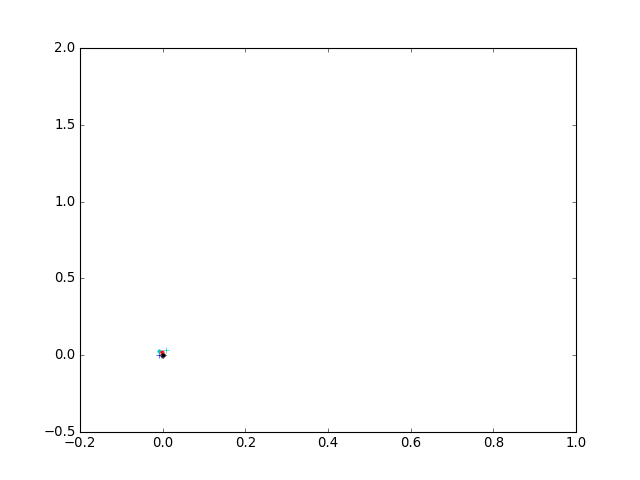

In [83]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.clf()

In [84]:
#les flèches
plt.annotate('', xy=(0, 0.2), xytext=(0, -0.2),arrowprops={'arrowstyle': '<->'})
plt.annotate('', xy=(0.2, 0), xytext=(-0.2, 0),arrowprops={'arrowstyle': '<->'})


In [85]:
plt.plot([1],[2])

In [58]:
plt.text(-0.05, 0.25, 'Populaire')
plt.text(-0.05, -0.25, 'Bizarre')
plt.text(-0.3, -0.01, 'Enfant')
plt.text(0.25, -0.01, 'SF')

In [59]:
plt.plot(svd.VT[0,:],svd.VT[1,:],'+') #userprint


In [60]:
#plt.plot(svd.U[:,0],svd.U[:,1],'*')#anime

In [61]:
#ajout à partir d'ici depuis la dernière fois

In [62]:
svd.VT[0,:]


array([ -1.46911482e-03,  -1.61325672e-03,  -2.09351642e-04, ...,
        -8.23820414e-04,  -9.62902094e-06,  -4.14329142e-03])

In [63]:
svd.VT[1,:]


array([  3.62917972e-03,   7.07388194e-04,  -4.01041440e-04, ...,
         3.62074016e-04,  -7.24459333e-05,   6.00554583e-04])

In [64]:
svd.U[:,0]

array([  1.82026273e-03,   3.88068431e-02,  -1.78112571e-21, ...,
         2.36657233e-03,   7.50355175e-05,   2.74779308e-03])

In [65]:
svd.U[:,1]

array([  1.20576270e-02,  -8.76214721e-03,   4.67939789e-20, ...,
         7.20280522e-04,  -1.47003076e-03,   1.63212711e-04])

In [66]:
svd.U[0,:]

array([ 0.00182026,  0.01205763, -0.01771658,  0.01293524, -0.00290718,
       -0.01014336, -0.00522149,  0.02473159, -0.00197875, -0.025145  ])

In [67]:
svd.VT[0,:].max()


0.21267369810999712

In [68]:
svd.VT[0,:].argmax()



7088

In [69]:
works[svd.VT[0,:].argmax(),1]

'Princesse Mononoké'

In [70]:
A=[svd.VT[0,i] for i in range(0, nb_items)]
A





[-0.0014691148219831936,
 -0.0016132567210993525,
 -0.00020935164207912154,
 0.0007747949452770928,
 -0.0099610074080161964,
 -0.00064587811098129047,
 -0.00056632505502280999,
 -0.0021110129477851392,
 0.001093588096687828,
 7.6098813667070901e-07,
 0.0010083294881237867,
 -0.0017694049784111429,
 -5.4208733243326489e-05,
 3.460518072632232e-05,
 -0.00016635523760711966,
 0.00020234533097024759,
 -0.0058217719737354619,
 7.3993012480449245e-05,
 -5.0969250266794145e-05,
 -0.0001592128837886087,
 0.0059409076455780299,
 0.0041535489981465402,
 0.0010026652804418822,
 -0.00019499435200326487,
 0.0038132732664345657,
 0.0021096948850893278,
 0.0017015510689616156,
 -8.7976005867041512e-05,
 0.0019382043445898155,
 -0.0017685262527398784,
 -0.00064778476127055776,
 0.0021018994199254247,
 -0.00034619748917229937,
 -0.00078911321819876389,
 0.0002681695026621721,
 7.3993012480449245e-05,
 0.0023218207581404467,
 0.0011644232177128525,
 -0.00017403205078027367,
 -0.0004510761190549694,
 -8.

In [71]:
A.sort()

A[nb_items-1]
#liste=A[0,nb_items-31:]
B=svd.VT[0,:].tolist()
B.index(A[nb_items-1])
list_haut=[works[B.index(A[i]),1] for i in range(nb_items-30,nb_items)]
list_haut 
#affichage du top 30 du 1er vecteur ligne de svd.VT

['Neon Genesis Evangelion',
 'Barakamon',
 'Code Geass: Hangyaku no Lelouch R2',
 'Fate/Zero',
 'Mahou Shoujo Madoka★Magica',
 'Cowboy Bebop',
 'Grave of the Fireflies',
 'Ghost in the Shell',
 'Baccano!',
 'Porco Rosso',
 'Kiki la petite sorcière',
 'Tengen Toppa Gurren Lagann',
 'FullMetal Alchemist',
 'Code Geass: Hangyaku no Lelouch',
 'Durarara!!',
 'Psycho-Pass',
 'Fullmetal Alchemist',
 "L'Attaque des Titans",
 'Toki wo Kakeru Shoujo',
 'Summer Wars',
 'Steins;Gate',
 'Death Note',
 'Le Château ambulant',
 'Fullmetal Alchemist: Brotherhood',
 'Nausicaä of the Valley of the Wind',
 'Les Enfants Loups : Ame & Yuki',
 'Le Château dans le ciel',
 'Mon voisin Totoro',
 'Le Voyage de Chihiro',
 'Princesse Mononoké']

# Un peu autre chose : DPP : determinential point process



In [135]:
#TODO : enlever le calcul des éléments sur la diagonale qui ne sert à rien
#remplir la partie triangulaire inférieure par ce qu'il faut et 1 sur diag
#changer np.vdot en np.dot

import numpy as np
import pandas
from math import sqrt

#requiert une matrice SVD nommée SVD
#retourne une matrice de similarité ésimilarity

def compute_similarity_coisine(SVD):
    nb_items=8347 #statique, test
    

    similarity=np.zeros([nb_items,nb_items])
    
    
    for current in range (0,nb_items):
        norme_current=sqrt(np.dot(SVD[:,current],SVD[:,current]))
        for j in range(current,nb_items):
            
            produit=np.dot(SVD[:,current],SVD[:,j])
            
            similarity[current,j]=produit/(norme_current*sqrt(np.vdot(SVD[:,j],SVD[:,j])))
            
    # ! : partie Triang inf est nulle pour l'instant, ajouter les él
    return similarity

A=compute_similarity_coisine(svd.VT)
A
#B=A   
#def compute_similarity_jaccart(SVD):
#   nb_items=8347 #statique, test
    

#  similarity=np.zeros([nb_items,nb_items])
    




array([[ 1.        ,  0.08471437, -0.56138472, ...,  0.14679545,
        -0.68534132,  0.00383582],
       [ 0.        ,  1.        , -0.07371975, ...,  0.03701757,
        -0.0280354 ,  0.91589537],
       [ 0.        ,  0.        ,  1.        , ..., -0.03505325,
         0.09011494,  0.15850288],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.11731634, -0.00233954],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.05507686],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [119]:
copie=svd.VT.copy()
copie.dot(copie.transpose())

array([[  1.00000000e+00,  -1.81592005e-16,  -9.06825003e-17,
         -3.23065142e-16,   6.05986005e-16,  -4.14703943e-16,
          9.60696298e-17,   5.26990018e-17,   6.51266269e-16,
         -1.78176769e-16],
       [ -1.81592005e-16,   1.00000000e+00,  -8.56028437e-17,
          3.02784632e-16,   7.26577451e-17,  -4.30165682e-18,
         -5.81695641e-17,   2.76481718e-16,   5.84835487e-17,
         -2.23976687e-16],
       [ -9.06825003e-17,  -8.56028437e-17,   1.00000000e+00,
         -3.40498774e-16,   8.63334096e-17,   3.63463532e-16,
          1.66936641e-16,   8.56943233e-17,   6.08656277e-16,
          3.86763714e-17],
       [ -3.23065142e-16,   3.02784632e-16,  -3.40498774e-16,
          1.00000000e+00,  -9.96382644e-16,  -2.22932295e-16,
          6.97429988e-17,   4.20467155e-16,  -4.82197646e-16,
         -6.70828071e-16],
       [  6.05986005e-16,   7.26577451e-17,   8.63334096e-17,
         -9.96382644e-16,   1.00000000e+00,  -6.30184042e-16,
         -1.09384988e-16

6.4666475126252409e-05

In [138]:
#version bcp plus rapide
#TODO : enlever le calcul des éléments sur la diagonale qui ne sert à rien
#remplir la partie triangulaire inférieure par ce qu'il faut et 1 sur diag
#changer np.vdot en np.dot

import numpy as np
import pandas
from math import sqrt

#requiert une matrice SVD nommée SVD
#retourne une matrice de similarité ésimilarity

def compute_similarity_coisine2(SVD):
    nb_items=8347 #statique, test
    J=SVD.transpose().dot(SVD)
    similarity=np.zeros([nb_items,nb_items])
    for current in range (0,nb_items):
        for j in range(current,nb_items):
            similarity[current,j]=J[current,j]/(sqrt(J[current,current])*sqrt(J[j,j]))
    # ! : partie Triang inf est nulle pour l'instant, ajouter les él
    return similarity

essai=compute_similarity_coisine2(svd.VT)
essai

array([[ 1.        ,  0.08471437, -0.56138472, ...,  0.14679545,
        -0.68534132,  0.00383582],
       [ 0.        ,  1.        , -0.07371975, ...,  0.03701757,
        -0.0280354 ,  0.91589537],
       [ 0.        ,  0.        ,  1.        , ..., -0.03505325,
         0.09011494,  0.15850288],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.11731634, -0.00233954],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.05507686],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [73]:
#for current in range (0,nb_items):
#        for j in range(current,nb_items):
#            B[j,current]=B[current,j]
A


array([[ 1.        ,  0.08471437, -0.56138472, ...,  0.14679545,
        -0.68534132,  0.00383582],
       [ 0.        ,  1.        , -0.07371975, ...,  0.03701757,
        -0.0280354 ,  0.91589537],
       [ 0.        ,  0.        ,  1.        , ..., -0.03505325,
         0.09011494,  0.15850288],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.11731634, -0.00233954],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.05507686],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [77]:
B=np.zeros([8347,8347])
for i in range(0,8347):
    for j in range(i,8347):
        B[i,j]=A[i,j]
        B[j,i]=A[i,j]
B

array([[ 1.        ,  0.08471437, -0.56138472, ...,  0.14679545,
        -0.68534132,  0.00383582],
       [ 0.08471437,  1.        , -0.07371975, ...,  0.03701757,
        -0.0280354 ,  0.91589537],
       [-0.56138472, -0.07371975,  1.        , ..., -0.03505325,
         0.09011494,  0.15850288],
       ..., 
       [ 0.14679545,  0.03701757, -0.03505325, ...,  1.        ,
         0.11731634, -0.00233954],
       [-0.68534132, -0.0280354 ,  0.09011494, ...,  0.11731634,
         1.        ,  0.05507686],
       [ 0.00383582,  0.91589537,  0.15850288, ..., -0.00233954,
         0.05507686,  1.        ]])

In [78]:
A

array([[ 1.        ,  0.08471437, -0.56138472, ...,  0.14679545,
        -0.68534132,  0.00383582],
       [ 0.        ,  1.        , -0.07371975, ...,  0.03701757,
        -0.0280354 ,  0.91589537],
       [ 0.        ,  0.        ,  1.        , ..., -0.03505325,
         0.09011494,  0.15850288],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.11731634, -0.00233954],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.05507686],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [79]:
def sample_k(items, L, k, max_nb_iterations=1000, rng=np.random):
    """
    Sample a list of k items from a DPP defined
    by the similarity matrix L. The algorithm
    is iterative and runs for max_nb_iterations.
    The algorithm used is from
    (Fast Determinantal Point Process Sampling with
    Application to Clustering, Byungkon Kang, NIPS 2013)
    """
    initial = rng.choice(range(len(items)), size=k, replace=False)
    X = [False] * len(items)
    for i in initial:
        X[i] = True
    X = np.array(X)
    for i in range(max_nb_iterations):
        u = rng.choice(np.arange(len(items))[X])
        v = rng.choice(np.arange(len(items))[~X])
        Y = X.copy()
        Y[u] = False
        L_Y = L[Y, :]
        L_Y = L_Y[:, Y]
        L_Y_inv = np.linalg.inv(L_Y)

        c_v = L[v:v+1, :]
        c_v = c_v[:, v:v+1]
        b_v = L[Y, :]
        b_v = b_v[:, v:v+1]
        c_u = L[u:u+1, :]
        c_u = c_u[:, u:u+1]
        b_u = L[Y, :]
        b_u = b_u[:, u:u+1]

        p = min(1, c_v - np.dot(np.dot(b_v.T, L_Y_inv), b_v) /
                (c_u - np.dot(np.dot(b_u.T, L_Y_inv.T), b_u)))
        if rng.uniform() <= p:
            X = Y[:]
            X[v] = True
    return np.array(items)[X]  

In [109]:
items=range(0,8347)
C=sample_k(items,A,10)
D=sample_k(items,B,10)
C



array([  43, 1842, 2124, 2477, 2596, 2608, 2794, 4811, 5501, 6015])

In [110]:
D

array([ 156,  569, 1360, 1655, 2341, 3150, 4917, 5947, 6567, 6674])

In [ ]:
#non testé, utilisation de sample_k pr l'instant
def sample(items, L, max_nb_iterations=1000, rng=np.random):
    """
    Sample a list of items from a DPP defined
    by the similarity matrix L. The algorithm
    is iterative and runs for max_nb_iterations.
    The algorithm used is from
    (Fast Determinantal Point Process Sampling with
    Application to Clustering, Byungkon Kang, NIPS 2013)
    """
    Y = rng.choice((True, False), size=len(items))
    L_Y = L[Y, :]
    L_Y = L_Y[:, Y]
    L_Y_inv = np.linalg.inv(L_Y)

    for i in range(max_nb_iterations):
        u = rng.randint(0, len(items))

        c_u = L[u:u+1, :]
        c_u = c_u[:, u:u+1]
        b_u = L[Y, :]
        b_u = b_u[:, u:u+1]
        if Y[u] == False:
            p_include_U = min(1, c_u - np.dot(np.dot(b_u.T, L_Y_inv), b_u))
            if rng.uniform() <= p_include_U:
                d_u = (c_u - np.dot(np.dot(b_u.T, L_Y_inv), b_u))
                upleft = (L_Y_inv +
                          np.dot(np.dot(np.dot(L_Y_inv, b_u), b_u.T),
                                 L_Y_inv) / d_u)
                upright = -np.dot(L_Y_inv, b_u) / d_u
                downleft = -np.dot(b_u.T, L_Y_inv) / d_u
                downright = d_u
                L_Y_inv = np.bmat([[upleft, upright], [downleft, downright]])
                Y[u] = True
                L_Y = L[Y, :]
                L_Y = L_Y[:, Y]
        else:
            p_remove_U = min(1, 1./(c_u - np.dot(np.dot(b_u.T, L_Y_inv), b_u)))
            if rng.uniform() <= p_remove_U:
                l = L_Y_inv.shape[0] - 1
                D = L_Y_inv[0:l, :]
                D = D[:, 0:l]
                e = L_Y_inv[0:l, :]
                e = e[:, l:l+1]
                f = L_Y_inv[l:l+1, :]
                f = f[:, l:l+1]
                L_Y_inv = D - np.dot(e, e.T) / f
                Y[u] = False
                L_Y = L[Y, :]
                L_Y = L_Y[:, Y]
    return np.array(items)[Y]

#items=range(0,8347)
#print(sample(items,A))



<IPython.core.display.Javascript object>


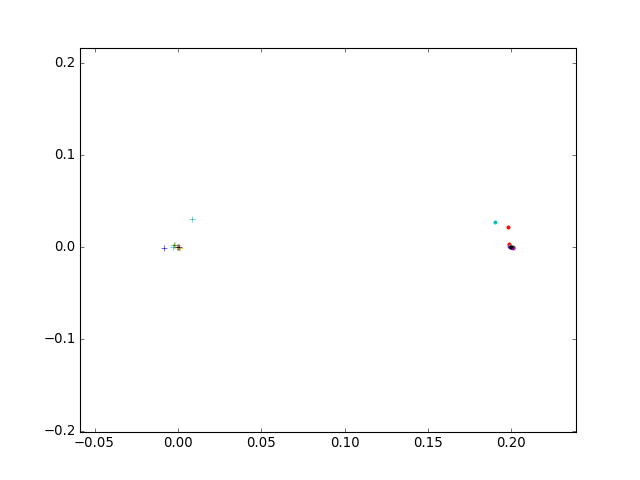

In [107]:
#B.tolist()
%matplotlib notebook
import matplotlib.pyplot as plt
plt.clf()
plt.clf()
plt.plot([1],[2])


#for i in range (0,len(C)):
#   plt.plot(svd.VT[0,C[i]],svd.VT[1,C[i]],'+')
for i in range (0,10):
    plt.plot(svd.VT[0,D[i]],svd.VT[1,D[i]],'+')
    
    
    plt.plot(svd.VT[0,i]+0.2,svd.VT[1,i],'.')
    


In [118]:
#pb
E=sample_k(items,B,15)
E


LinAlgError: Singular matrix

In [ ]:
#B.tolist()
%matplotlib notebook
import matplotlib.pyplot as plt
plt.clf()
plt.clf()
plt.plot([1],[2])


#for i in range (0,len(C)):
#   plt.plot(svd.VT[0,C[i]],svd.VT[1,C[i]],'+')
for i in range (0,10):
    plt.plot(svd.VT[0,E[i]],svd.VT[1,E[i]],'+')
    
    
    plt.plot(svd.VT[0,i]+0.2,svd.VT[1,i],'.')